In [1]:
#引用tensorflow函式庫
import tensorflow
#引用keras函式庫
import keras
#引用csv函式庫
import csv
#引用numpy函式庫
import numpy
#引用pyplot函式庫
import matplotlib.pyplot as plot

from keras.layers import Input, Dense
from keras.models import Model

import datetime
start = datetime.datetime.now().time()

#輸入變數數量
num_inputs = 19

#讀取訓練資料
dataset = numpy.loadtxt("Data.csv", delimiter=",")
X = dataset[:,0:num_inputs]
Y = X
#dataset_y = dataset[:,num_inputs]
#Y = keras.utils.to_categorical(dataset_y, num_classes)

Using TensorFlow backend.


Epoch 1/100
19/19 [==============================] - 0s 22ms/step - loss: 0.4104 - mean_absolute_error: 0.4910
Epoch 2/100
19/19 [==============================] - 0s 527us/step - loss: 0.2559 - mean_absolute_error: 0.3878
Epoch 3/100
19/19 [==============================] - 0s 579us/step - loss: 0.2174 - mean_absolute_error: 0.3645
Epoch 4/100
19/19 [==============================] - 0s 579us/step - loss: 0.1958 - mean_absolute_error: 0.3573
Epoch 5/100
19/19 [==============================] - 0s 632us/step - loss: 0.1727 - mean_absolute_error: 0.3047
Epoch 6/100
19/19 [==============================] - 0s 527us/step - loss: 0.1747 - mean_absolute_error: 0.3227
Epoch 7/100
19/19 [==============================] - 0s 527us/step - loss: 0.1845 - mean_absolute_error: 0.3564
Epoch 8/100
19/19 [==============================] - 0s 527us/step - loss: 0.1816 - mean_absolute_error: 0.3135
Epoch 9/100
19/19 [==============================] - 0s 527us/step - loss: 0.1761 - mean_absolute_error: 

19/19 [==============================] - 0s 527us/step - loss: 0.0839 - mean_absolute_error: 0.2020
Epoch 74/100
19/19 [==============================] - 0s 579us/step - loss: 0.0889 - mean_absolute_error: 0.2116
Epoch 75/100
19/19 [==============================] - 0s 579us/step - loss: 0.0875 - mean_absolute_error: 0.2106
Epoch 76/100
19/19 [==============================] - 0s 579us/step - loss: 0.0869 - mean_absolute_error: 0.2053
Epoch 77/100
19/19 [==============================] - 0s 527us/step - loss: 0.0881 - mean_absolute_error: 0.2068
Epoch 78/100
19/19 [==============================] - 0s 474us/step - loss: 0.0858 - mean_absolute_error: 0.2001
Epoch 79/100
19/19 [==============================] - 0s 579us/step - loss: 0.0840 - mean_absolute_error: 0.2009
Epoch 80/100
19/19 [==============================] - 0s 527us/step - loss: 0.0873 - mean_absolute_error: 0.2060
Epoch 81/100
19/19 [==============================] - 0s 579us/step - loss: 0.0890 - mean_absolute_error: 0.2

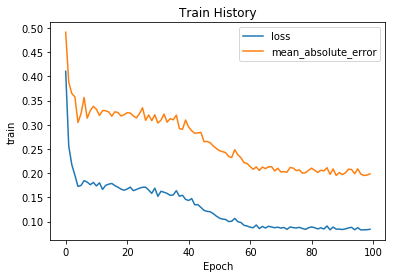

In [2]:
#設定亂數種子
numpy.random.seed(0)

# this is the size of our encoded representations
encoding_dim = 2  # 2 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
inputs = Input(shape=(num_inputs,))
# "encoded" is the encoded representation of the input
encoded1 = Dense(40, activation='sigmoid')(inputs)
encoded2 = Dense(80, activation='sigmoid')(encoded1)
encoded3 = Dense(160, activation='sigmoid')(encoded2)
# "decoded" is the lossy reconstruction of the input
decoded2 = Dense(80, activation='linear')(encoded3)
decoded1 = Dense(40, activation='linear')(decoded2)
decoded = Dense(num_inputs, activation='linear')(decoded1)

# this model maps an input to its reconstruction
autoencoder = Model(inputs, decoded)

# this model maps an input to its encoded representation
encoder = Model(inputs, decoded1)

# 
autoencoder.compile(loss='mean_squared_error', optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08), metrics = ['mae'])

#訓練神經網路
train_history = autoencoder.fit(X, X, epochs = 100, batch_size = 3) #訓練回合數: 20000, 每3筆修正權重

def show_train_history(train_history, x1, x2):
    plot.plot(train_history.history[x1])
    plot.plot(train_history.history[x2])
    plot.title('Train History')
    plot.ylabel('train')
    plot.xlabel('Epoch')
    plot.legend([x1, x2], loc = 'upper right')
    plot.show()

#顯示訓練過程
show_train_history(train_history, 'loss', 'mean_absolute_error')

#儲存模型
autoencoder.save('AE(linear).h5')
autoencoder.save_weights("AE(linear)_weights.h5")

In [3]:
#讀取訓練資料
dataset = numpy.loadtxt("Data.csv", delimiter=",")
X = dataset[:,0:num_inputs] 
predictions = encoder.predict(X)
print(predictions)
#將測試結果寫入predictions.csv
numpy.savetxt("Result(AE+linear).csv", predictions, delimiter=",")

print(start)
print(datetime.datetime.now().time())

[[ 1.87361047e-01  6.39035553e-02 -3.04911397e-02 -1.10485233e-01
   1.73414513e-01 -9.99596268e-02  9.09360349e-02 -7.28507787e-02
   1.80904567e-01  7.56901950e-02 -1.21886954e-01  2.17938766e-01
   1.78610399e-01 -2.90655136e-01  3.26275557e-01 -1.75071523e-01
   2.59260952e-01 -9.73052457e-02  3.09170693e-01  1.75522655e-01
   3.82088214e-01  4.68953438e-02  1.31678626e-01 -1.90426275e-01
   1.73596535e-02 -1.67465478e-01 -1.57141802e-03 -2.01250061e-01
  -8.79843011e-02 -2.05823496e-01 -2.77837217e-01  5.70044369e-02
  -2.07804024e-01 -1.21605140e-03 -2.43870080e-01 -4.52122062e-01
   5.19711852e-01 -1.50206417e-01 -1.62648223e-02 -2.27986455e-01]
 [ 2.34594196e-01  9.86557901e-02  4.47144657e-02 -1.07155688e-01
   2.38168702e-01 -1.53400242e-01  1.92448422e-01 -5.37288561e-02
   2.60545582e-01  1.65725142e-01 -1.61032289e-01  3.44121218e-01
   2.97066718e-01 -3.30524236e-01  3.40252131e-01 -2.57136434e-01
   3.21264535e-01 -8.68097842e-02  2.87235409e-01  2.41808340e-01
   3.8676